![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [10]:
# Importing pandas and matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Start coding!

### Load data

In [11]:
netflix_df=pd.read_csv("netflix_data.csv",parse_dates=["date_added"])

In [12]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,123,A brilliant group of students become card-coun...,Dramas


### General information

In [13]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   duration      7787 non-null   int64         
 9   description   7787 non-null   object        
 10  genre         7787 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 669.3+ KB


### Handle missing values

In [14]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [15]:
# filling with most freqiency value
col_with_missing=netflix_df.columns[netflix_df.isna().sum()>0]
for i in col_with_missing:
    netflix_df[i].fillna( netflix_df[i].mode()[0],inplace=True)
netflix_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [16]:
 netflix_df.duplicated().sum()

0

### Types of show excepted the " TV show"

In [17]:

netflix_subset=netflix_df[netflix_df["type"]!="TV Show"]
print(netflix_subset)

     show_id  ...          genre
1         s2  ...         Dramas
2         s3  ...  Horror Movies
3         s4  ...         Action
4         s5  ...         Dramas
6         s7  ...  Horror Movies
...      ...  ...            ...
7781   s7782  ...       Children
7782   s7783  ...         Dramas
7783   s7784  ...         Dramas
7784   s7785  ...  Documentaries
7786   s7787  ...  Documentaries

[5377 rows x 11 columns]


### which Shows's type produce more ?

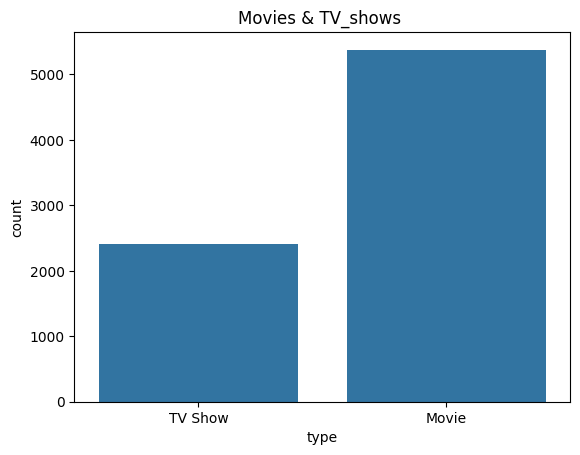

In [18]:
sns.countplot(data=netflix_df,x="type")
plt.title("Movies & TV_shows ")
plt.show()

### Show's types by duration

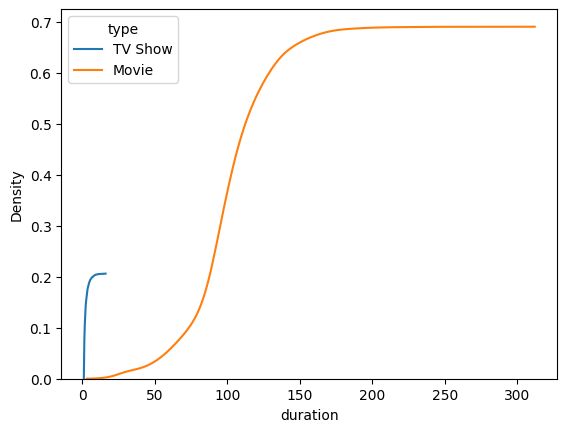

In [19]:
sns.kdeplot(data=netflix_df,x="duration",hue="type",cut=0,cumulative=True) 
plt.show()

In [20]:
netflix_movies=netflix_subset[["title","country","genre","release_year","duration"]]

### which movie's type produce more ?

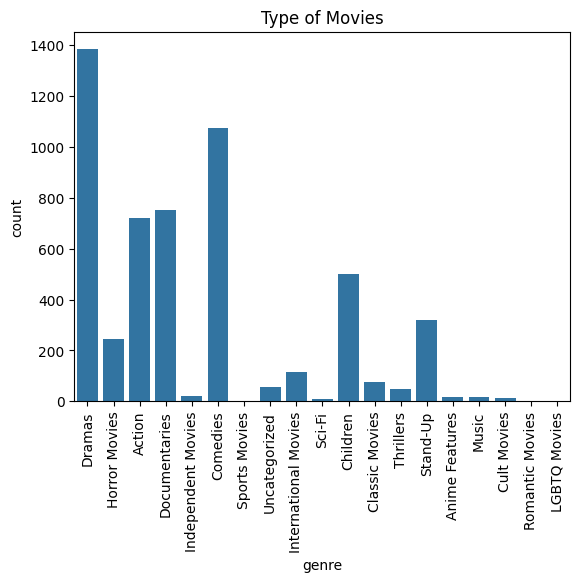

In [21]:
sns.countplot(data=netflix_movies,x="genre")
plt.xticks(rotation=90)
plt.title("Type of Movies")
plt.show()

In [22]:
short_movies=netflix_movies[netflix_movies["duration"]<60]

Produced by Netflix over the deacdes
### which deacde with high produce?

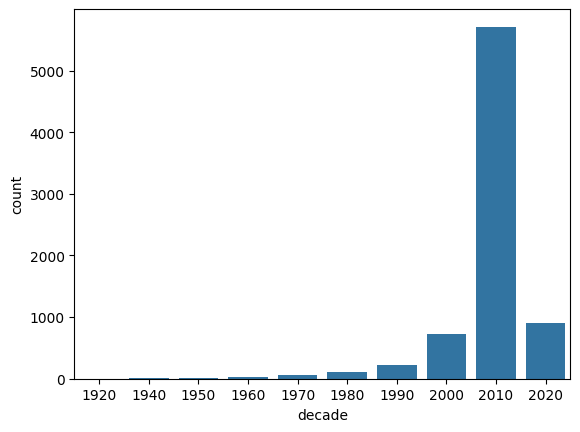

In [23]:
import numpy as np
netflix_df["decade"]=np.floor(netflix_df["release_year"]/10)*10
netflix_df["decade"]=netflix_df["decade"].astype(int)

sns.countplot(data=netflix_df,x="decade")
plt.show()

In [24]:
colors=[]
for row ,columns in netflix_movies.iterrows():
    if columns["genre"]=="Children":
        colors.append("red")
    elif columns["genre"]=="Documentaries":
        colors.append("blue")
    elif columns["genre"]=="Stand-Up":
        colors.append("green")
    else :
        colors.append("yellow")

### Movie Duration by Year

Text(0.5, 1.0, 'Movie Duration by Year of Release')

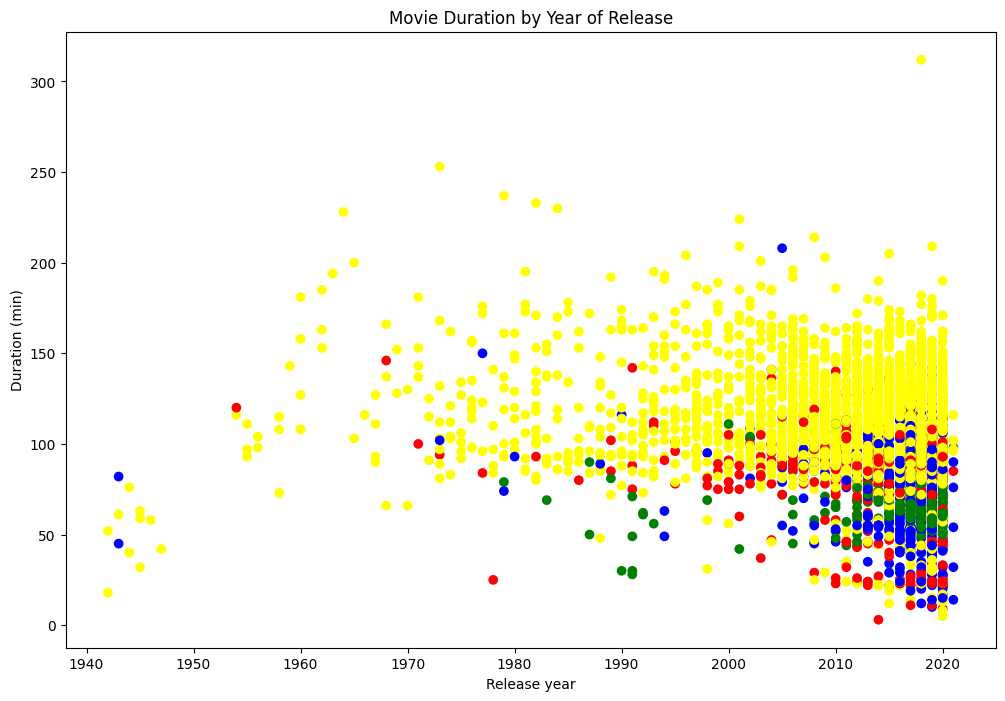

In [25]:
fig=plt.figure(figsize=(12,8))
plt.scatter(netflix_movies["release_year"],netflix_movies["duration"],color=colors)
plt.ylabel("Duration (min)")
plt.xlabel("Release year")
plt.title("Movie Duration by Year of Release")

